# Titanic 데이터는 타이타닉호의 탑승자들의 생존에 관련한 데이터이다. 데이터에 대한 설명은 아래와 같다.
|변수|설명|
|:--|:--|
|pclass|1,2,3등석 정보를 각각 1,2,3으로 저장|
|survived|생존 여부(0 : 사망, 1: 생존|
|name|이름|
|sex|성별|
|age|나이|
|sibsp|함께 탑승한 형제 또는 배우자의 수|
|parch|함께 탑승한 형제 또는 자녀의 수|
|ticket|티켓번호|
|fare|티켓요금|
|cabin|선실번호|
|embarked|탑승한 곳(C, Q, S)|

## 1. cabin, embarked변수의 값 중 ""로 처리된 값을 NA로 바꾸고 아래의 데이터 테이블을 보고 문자형, 범주형 변수들을 각각 character, factor형으로 변환하시오. 또, 수치형 변수가 NA인 값을 중앙값으로 대체하고, 범주형 변수가 NA인 값을 최빈값으로 대체하고 age변수를 아래의 표와 같이 구간화하여 age_1이라는 변수를 생성하고 추가하시오
|범주|범위|
|:--:|:--:|
|0|0이상 10미만|
|1|10이상 20미만|
|2|20이상 30미만|
|3|30이상 40미만|
|4|40이상 50미만|
|5|50이상 60미만|
|6|60이상 70미만|
|7|70이상 80미만|
|8|80이상 90미만|

In [74]:
# 모듈 불러오기
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

In [2]:
# 데이터 불러오기
titanic = pd.read_csv('./Data/data_edu/모의고사 2회/titanic.csv')

In [3]:
# 데이터 정보 확인하기
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   cabin     295 non-null    object 
 10  embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [4]:
# 데이터 shape 확인하기
titanic.shape

(1309, 11)

In [5]:
# 데이터 확인 - head()
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


- age : 결측치 존재
- fare : 결측치 존재
- cabin : 결측치 존재
- embarked : 결측치 존재

### cabin 데이터 탐색

In [6]:
# 유일값 확인
titanic['cabin'].unique()

array(['B5', 'C22 C26', 'E12', 'D7', 'A36', 'C101', nan, 'C62 C64', 'B35',
       'A23', 'B58 B60', 'D15', 'C6', 'D35', 'C148', 'C97', 'B49', 'C99',
       'C52', 'T', 'A31', 'C7', 'C103', 'D22', 'E33', 'A21', 'B10', 'B4',
       'E40', 'B38', 'E24', 'B51 B53 B55', 'B96 B98', 'C46', 'E31', 'E8',
       'B61', 'B77', 'A9', 'C89', 'A14', 'E58', 'E49', 'E52', 'E45',
       'B22', 'B26', 'C85', 'E17', 'B71', 'B20', 'A34', 'C86', 'A16',
       'A20', 'A18', 'C54', 'C45', 'D20', 'A29', 'C95', 'E25', 'C111',
       'C23 C25 C27', 'E36', 'D34', 'D40', 'B39', 'B41', 'B102', 'C123',
       'E63', 'C130', 'B86', 'C92', 'A5', 'C51', 'B42', 'C91', 'C125',
       'D10 D12', 'B82 B84', 'E50', 'D33', 'C83', 'B94', 'D49', 'D45',
       'B69', 'B11', 'E46', 'C39', 'B18', 'D11', 'C93', 'B28', 'C49',
       'B52 B54 B56', 'E60', 'C132', 'B37', 'D21', 'D19', 'C124', 'D17',
       'B101', 'D28', 'D6', 'D9', 'B80', 'C106', 'B79', 'C47', 'D30',
       'C90', 'E38', 'C78', 'C30', 'C118', 'D36', 'D48', 'D47', '

In [7]:
# cabin 컬럼 데이터 확인
titanic[titanic['cabin'] == ""]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked


### embarked 데이터 탐색

In [8]:
# 유일값 확인
titanic['embarked'].unique()

array(['S', 'C', nan, 'Q'], dtype=object)

In [9]:
# embarked 컬럼 데이터 확인
titanic[titanic['embarked'] == ""]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked


### 수치형 변수인 데이터

In [10]:
# 수치형 데이터만 추출하기 - titanic_num
cols = titanic.columns
num_cols = list()
for idx, dtype in enumerate(titanic.dtypes):
    if dtype != 'object':
        num_cols.append(cols[idx])

titanic_num = titanic[num_cols]
titanic_num.head()

,pclass,survived,age,sibsp,parch,fare
0,1,1,29.00,0,0,211.3375
1,1,1,0.92,1,2,151.5500
2,1,0,2.00,1,2,151.5500
3,1,0,30.00,1,2,151.5500
4,1,0,25.00,1,2,151.5500


In [11]:
# 데이터 정보 확인
titanic_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   age       1046 non-null   float64
 3   sibsp     1309 non-null   int64  
 4   parch     1309 non-null   int64  
 5   fare      1308 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 61.5 KB


In [12]:
# age, fare가 결측치를 가지고 있으므로 확인
titanic_num['age'][titanic_num['age'].isna()]

15     NaN
37     NaN
40     NaN
46     NaN
59     NaN
        ..
1293   NaN
1297   NaN
1302   NaN
1303   NaN
1305   NaN
Name: age, Length: 263, dtype: float64

In [13]:
# age, fare가 결측치를 가지고 있으므로 확인
titanic_num['fare'][titanic_num['fare'].isna()]

1225   NaN
Name: fare, dtype: float64

In [14]:
# age와 fare 컬럼데이터의 median값을 구하자
median_age = titanic_num['age'].median()
median_fare = titanic_num['fare'].median()
titanic_num['age'] = titanic_num['age'].fillna(median_age)
titanic_num['fare'] = titanic_num['fare'].fillna(median_fare)

<ipython-input-14-d2bbba62c90c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_num['age'] = titanic_num['age'].fillna(median_age)
<ipython-input-14-d2bbba62c90c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_num['fare'] = titanic_num['fare'].fillna(median_fare)


In [15]:
# 데이터 확인
titanic_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   age       1309 non-null   float64
 3   sibsp     1309 non-null   int64  
 4   parch     1309 non-null   int64  
 5   fare      1309 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 61.5 KB


### 범주형 변수인 데이터

In [16]:
# 수치형 데이터만 추출하기 - titanic_num
titanic_obj = titanic.drop(num_cols, axis = 1)
titanic_obj.head()

,name,sex,ticket,cabin,embarked
0,"Allen, Miss. Elisabeth Walton",female,24160,B5,S
1,"Allison, Master. Hudson Trevor",male,113781,C22 C26,S
2,"Allison, Miss. Helen Loraine",female,113781,C22 C26,S
3,"Allison, Mr. Hudson Joshua Creighton",male,113781,C22 C26,S
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,113781,C22 C26,S


In [17]:
# 데이터 정보 확인
titanic_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      1309 non-null   object
 1   sex       1309 non-null   object
 2   ticket    1309 non-null   object
 3   cabin     295 non-null    object
 4   embarked  1307 non-null   object
dtypes: object(5)
memory usage: 51.3+ KB


In [18]:
# 각 컬럼의 최빈값 구하기
mode_cabin = titanic_obj['cabin'].mode().to_list()[0]
mode_embarked = titanic_obj['embarked'].mode().to_list()[0]
titanic_obj['cabin'] = titanic_obj['cabin'].fillna(mode_cabin)
titanic_obj['embarked'] = titanic_obj['embarked'].fillna(mode_embarked)

In [19]:
# 데이터 확인
titanic_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      1309 non-null   object
 1   sex       1309 non-null   object
 2   ticket    1309 non-null   object
 3   cabin     1309 non-null   object
 4   embarked  1309 non-null   object
dtypes: object(5)
memory usage: 51.3+ KB


### age 변수 구간화하기

In [23]:
# age 변수 구간화 하기
age_1 = pd.cut(titanic_num['age'],bins = [10*x for x in range(10)], labels = [x for x in range(9)]).to_frame()
age_1.columns = ['age_1']

### 전처리 완료된 데이터 프레임 만들기 - titanic_processed

In [24]:
# 데이터프레임 생성 - titanic_processed
titanic_processed = pd.concat([titanic_num, age_1, titanic_obj], axis = 1)

In [41]:
# 데이터 확인
titanic_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pclass    1309 non-null   int64   
 1   survived  1309 non-null   int64   
 2   age       1309 non-null   float64 
 3   sibsp     1309 non-null   int64   
 4   parch     1309 non-null   int64   
 5   fare      1309 non-null   float64 
 6   age_1     1309 non-null   category
 7   name      1309 non-null   object  
 8   sex       1309 non-null   object  
 9   ticket    1309 non-null   object  
 10  cabin     1309 non-null   object  
 11  embarked  1309 non-null   object  
dtypes: category(1), float64(2), int64(4), object(5)
memory usage: 114.3+ KB


## 2) 전처리가 완료된 titanic 데이터를 train(70%), test(30%) 데이터로 분할하시오. 또, train 데이터로 종속변수인 survived(생존 여부)를 독립변수 pclass, sex, sibsp, parch, fare, embarked로 지정하여 예측하는 분류모델을 3개 이상 생성하고 test 데이터에 대한 예측값을 csv파일로 각각 제출하시오

In [42]:
# 회귀분석을 위해서 범주형 데이터를 더미변수화 해야 한다
# 'sex', 'embarked' 두가지에 대해서 더미 변수화
dummies = pd.get_dummies(titanic_processed[['sex', 'embarked']])
tmp_df = titanic_processed.drop(['sex', 'embarked'], axis = 1)
titanic_reg = pd.concat([tmp_df, dummies], axis = 1)
titanic_reg.head()

,pclass,survived,age,sibsp,parch,fare,age_1,name,ticket,cabin,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1,1,29.00,0,0,211.3375,2,"Allen, Miss. Elisabeth Walton",24160,B5,1,0,0,0,1
1,1,1,0.92,1,2,151.5500,0,"Allison, Master. Hudson Trevor",113781,C22 C26,0,1,0,0,1
2,1,0,2.00,1,2,151.5500,0,"Allison, Miss. Helen Loraine",113781,C22 C26,1,0,0,0,1
3,1,0,30.00,1,2,151.5500,2,"Allison, Mr. Hudson Joshua Creighton",113781,C22 C26,0,1,0,0,1
4,1,0,25.00,1,2,151.5500,2,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",113781,C22 C26,1,0,0,0,1


In [44]:
# 종속변수와 독립변수로 분할하기
y = titanic_reg['survived']
X = titanic_reg[['pclass', 'sex_female', 'sex_male' ,'sibsp', 'parch', 'fare', 'embarked_C', 'embarked_Q', 'embarked_S']]

In [45]:
# train, test 데이터로 분할하기
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 12345)

In [46]:
# 데이터 분할상태 확인
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((916, 9), (393, 9), (916,), (393,))

### 분류모델 3가지
- 로지스틱 분류
- 의사결정나무
- 랜덤포레스트

In [54]:
# 분류모델1 - 의사결정나무
model1 = DecisionTreeClassifier()
model1_fit = model1.fit(X_test, y_test)

In [55]:
# confusion matrix - test
pd.crosstab(y_test, model1_fit.predict(X_test), rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,226,7
1,19,141


In [56]:
# classification_report - test
print(classification_report(y_test, model1_fit.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       233
           1       0.95      0.88      0.92       160

    accuracy                           0.93       393
   macro avg       0.94      0.93      0.93       393
weighted avg       0.93      0.93      0.93       393



In [58]:
# accuaccuracy_score - test
round(accuracy_score(y_test, model1_fit.predict(X_test)),3)

0.934

In [59]:
# 분류모델2 - 랜덤포레스트
model2 = RandomForestClassifier()
model2_fit = model2.fit(X_train, y_train)

In [60]:
# confusion matrix - test
pd.crosstab(y_test, model2_fit.predict(X_test), rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,196,37
1,59,101


In [61]:
# classification_report - test
print(classification_report(y_test, model2_fit.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       233
           1       0.73      0.63      0.68       160

    accuracy                           0.76       393
   macro avg       0.75      0.74      0.74       393
weighted avg       0.75      0.76      0.75       393



In [62]:
# accuaccuracy_score - test
round(accuracy_score(y_test, model2_fit.predict(X_test)),3)

0.756

In [64]:
# 분류모델3 - 로지스틱회귀
model3 = LogisticRegression()
model3_fit = model3.fit(X_train, y_train)

C:\Users\bcduc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
# confusion matrix - test
pd.crosstab(y_test, model3_fit.predict(X_test), rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,193,40
1,51,109


In [66]:
# classification_report - test
print(classification_report(y_test, model3_fit.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       233
           1       0.73      0.68      0.71       160

    accuracy                           0.77       393
   macro avg       0.76      0.75      0.76       393
weighted avg       0.77      0.77      0.77       393



In [67]:
# accuaccuracy_score - test
round(accuracy_score(y_test, model3_fit.predict(X_test)),3)

0.768

### 3) 생성된 3개의 분류모델에 대해 성과분석을 실시하여 정확도를 비교하여 설명하시오. 또, ROC curve를 그리고  AUC값을 산출하시오

In [70]:
# 1. 시각화를 위해서 준비, 알고리즘 생성
class_map = {
  'LogisticRegression'    :('-',  LogisticRegression()),
  'DecisionTreeClassifier':('--', DecisionTreeClassifier()),
  'RandomForestClassifier':('.-', RandomForestClassifier()),
  'GaussianNB'            :(':',  GaussianNB())
}

C:\Users\bcduc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression 0.8217811158798283
DecisionTreeClassifier 0.7582081545064379
RandomForestClassifier 0.8176233905579399
GaussianNB 0.8259388412017167


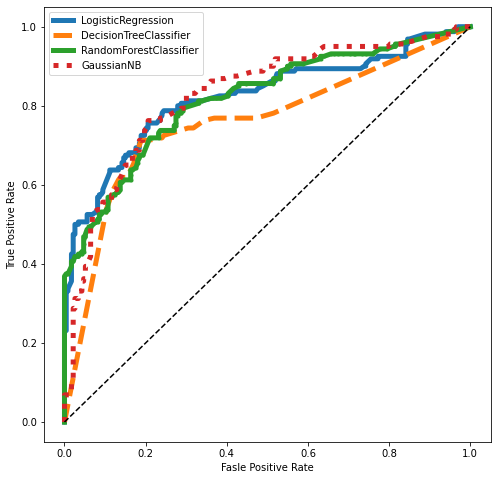

In [75]:
plt.figure( figsize=(8, 8))
for key, ( line_style, model ) in class_map.items():
    model.fit( X_train, y_train )
    predict     = model.predict_proba( X_test )  
    pred        = pd.Series( predict[:, 1] )
    fpr, tpr, _ = roc_curve( y_test, pred )
    plt.plot( fpr, tpr, line_style, linewidth=5, label=key )
    print( key, auc( fpr, tpr) )

plt.legend()
plt.plot( [0,1], [0,1], 'k--' )
plt.xlabel('Fasle Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()